In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('../data/rental_data_amsterdam_final.csv')
df2 = pd.read_excel('../data/Postalcodes_translation.xlsx')

In [3]:
#renaming column before joining
df1.rename(columns={'postcode_amsterdam': 'Postalcode'}, inplace=True)

#merging files with left join
df3 = pd.merge(df1, df2, on ='Postalcode', how ='left') 

In [4]:
#check if duplicates
before = len(df3)
adam_postalcodes = df3.drop_duplicates(subset=None, keep='first')
after = len(df3)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [5]:
#renaming columns
df3.rename(columns={'house_price_amsterdam': 'Rental Price','rental_agency_amsterdam': 'Rental Agency'
                    ,'bedrooms_amsterdam': 'Bedrooms', 'surface_amsterdam': 'Square Meter', 'Housenumber': 'House Number'
                    , 'Name_neighbourhood': 'Neighbourhood', 'Name_district': 'District', 'Name_municipality': 'Municipality'}, inplace=True)

#removing unecessary columns
df_final = df3.drop(['District2019', 'Municipality2019', 'Neighbourhood2019', 'District2019', 'Unnamed: 0'], axis = 1)

    
df_final.head()


,Rental Price,Rental Agency,Postalcode,Bedrooms,Square Meter,House Number,Neighbourhood,District,Municipality
0,2750.0,Out Amsterdam,1078JP,4,129,2,Scheldebuurt West,Scheldebuurt,Amsterdam
1,2750.0,Out Amsterdam,1078JP,4,129,4,Scheldebuurt West,Scheldebuurt,Amsterdam
2,2750.0,Out Amsterdam,1078JP,4,129,6,Scheldebuurt West,Scheldebuurt,Amsterdam
3,2750.0,Out Amsterdam,1078JP,4,129,8,Scheldebuurt West,Scheldebuurt,Amsterdam
4,2750.0,Out Amsterdam,1078JP,4,129,10,Scheldebuurt West,Scheldebuurt,Amsterdam


In [6]:
#group by neighbourhood
grouped = df_final.groupby('Neighbourhood')['Rental Price'].agg(['mean']).sort_values('mean', ascending=False)

#styling
grouped_final = grouped.head(10).style.format('€{0:,.0f}')\
                .bar(subset=['mean'], color='indianred')

grouped_final


,mean
Neighbourhood,
Vondelparkbuurt Midden,"€5,222"
Amsterdamse Bos,"€4,995"
Diepenbrockbuurt,"€4,407"
Cornelis Schuytbuurt,"€4,081"
Valeriusbuurt Oost,"€3,890"
Willemsparkbuurt Noord,"€3,583"
Vondelparkbuurt Oost,"€3,546"
Minervabuurt Noord,"€3,532"
Emanuel van Meterenbuurt,"€3,500"


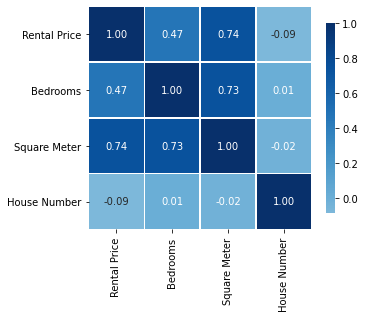

In [7]:
#data correlation
correlations = df_final.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True,cmap=('Blues'), linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [8]:
#creating a new column with buckets

df_final.loc [df_final['Square Meter'] <=20, 'm2'] = '0-20'
df_final.loc [(df_final['Square Meter'] >20) & (df_final['Square Meter'] <=40), 'm2'] = '21-40'
df_final.loc [(df_final['Square Meter'] >40) & (df_final['Square Meter'] <=60), 'm2'] = '41-60'
df_final.loc [(df_final['Square Meter'] >60) & (df_final['Square Meter'] <=80), 'm2'] = '61-80'
df_final.loc [(df_final['Square Meter'] >80) & (df_final['Square Meter'] <=100), 'm2'] = '81-100'
df_final.loc [df_final['Square Meter'] >100, 'm2'] = '+100'

df_final.head()

,Rental Price,Rental Agency,Postalcode,Bedrooms,Square Meter,House Number,Neighbourhood,District,Municipality,m2
0,2750.0,Out Amsterdam,1078JP,4,129,2,Scheldebuurt West,Scheldebuurt,Amsterdam,+100
1,2750.0,Out Amsterdam,1078JP,4,129,4,Scheldebuurt West,Scheldebuurt,Amsterdam,+100
2,2750.0,Out Amsterdam,1078JP,4,129,6,Scheldebuurt West,Scheldebuurt,Amsterdam,+100
3,2750.0,Out Amsterdam,1078JP,4,129,8,Scheldebuurt West,Scheldebuurt,Amsterdam,+100
4,2750.0,Out Amsterdam,1078JP,4,129,10,Scheldebuurt West,Scheldebuurt,Amsterdam,+100


In [9]:
#analyze data with pivot table
df_pivot = pd.pivot_table (df_final, 'Rental Price', index = ['District'],
                columns = ['m2'], aggfunc = np.mean, margins = True, margins_name = 'Grand Total', fill_value = 0)\
.sort_values(by=('Grand Total'),ascending=False)

#styling
df_style = df_pivot.head(10).style.format('{0:,.0f}')\
.background_gradient(cmap='Blues')\
                
df_style

m2,+100,0-20,21-40,41-60,61-80,81-100,Grand Total
District,,,,,,,
Vondelbuurt,"5,645",0,0,0,"1,791","2,833","4,203"
Willemspark,"4,477",0,0,"1,600","1,951","3,068","3,504"
Apollobuurt,"3,681",0,0,0,"1,940","2,162","3,389"
Museumkwartier,"4,189",0,"1,850","1,794","2,018","2,712","3,097"
Grachtengordel-West,"3,696",0,"1,308","1,614","1,831","2,294","2,484"
Zuidas,"2,943",0,0,"1,465","2,206","2,569","2,425"
Houthavens,"4,936",0,"1,100",0,"1,675","2,218","2,406"
Zuid Pijp,0,0,0,0,"2,489","2,175","2,378"
Oostelijke Eilanden/Kadijken,"3,256",0,0,"1,582","1,786","2,043","2,326"


In [11]:
#pivot rianne - stlying 
df_pivot2 = pd.pivot_table (df_final, 'Rental Price', index = ['Neighbourhood'],
                columns = ['Bedrooms'], aggfunc = np.mean, margins = True, margins_name = 'Grand Total', fill_value = 0)\
.sort_values(by=('Grand Total'),ascending=False)

#formatting
df_style2 = df_pivot2.head(10).style.format('{0:,.0f}')\
.background_gradient(cmap='GnBu')\
                
df_style2

Bedrooms,1,2,3,4,5,6,7,Grand Total
Neighbourhood,,,,,,,,
Vondelparkbuurt Midden,0,0,"1,753","3,650","7,500",0,"8,750","5,222"
Amsterdamse Bos,0,"4,995",0,0,0,0,0,"4,995"
Diepenbrockbuurt,0,0,"2,325",0,0,"4,000","4,978","4,407"
Cornelis Schuytbuurt,0,"3,417","3,325","4,732","4,544","5,704","6,088","4,081"
Valeriusbuurt Oost,0,"1,890","2,104","3,418","5,539","6,000",0,"3,890"
Willemsparkbuurt Noord,0,0,"3,167","3,953","3,000","6,500",0,"3,583"
Vondelparkbuurt Oost,0,"1,778","2,673","4,000","6,500",0,0,"3,546"
Minervabuurt Noord,0,0,"2,952","4,462","4,286",0,0,"3,532"
Emanuel van Meterenbuurt,0,0,0,0,"3,500",0,0,"3,500"
